In [1]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
from IPython.display import Image



In [2]:
pos = Image('D:\pubpos.png')
neg = Image('D:\pubneg.png')

In [3]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)

In [4]:
import json

file_name = 'callbot.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[5].text

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

In [5]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [6]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

47
47


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

The stories are interesting but they simply end....without really having a satisfying ending or a resolution to them. It's like the author could not figure out how to end something, so he simply ended it ...and lets the reader try to figure out which direction it should take. Only the first one had a good ending but the story itself was poor.
[[0. 0. 0. ... 0. 0. 0.]]


In [8]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [9]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))

0.7


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [11]:
print(clf_dec.score(test_x_vectors, test_y))

0.6666666666666666


In [12]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [13]:
print(clf_gnb.score(test_x_vectors, test_y))

0.6666666666666666


In [14]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [15]:
print(clf_log.score(test_x_vectors, test_y))

0.7333333333333333


In [16]:
test_set = [ 'I lov my boyfriend' ]
new_test = vectorizer.transform(test_set)

result = clf_log.predict(new_test)

In [17]:
result

array(['NEGATIVE'], dtype='<U8')

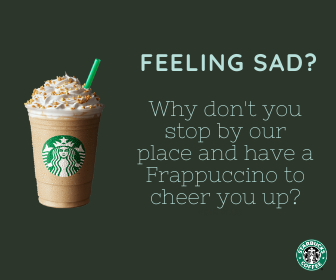

In [18]:
if result == 'POSITIVE': 
    display(pos)
else: 
    display(neg)

In [19]:
test_set = [ 'SpaceX is going to launch Starships again this afternoon, Im so excited to see that!!']
new_test = vectorizer.transform(test_set)

result = clf_log.predict(new_test)

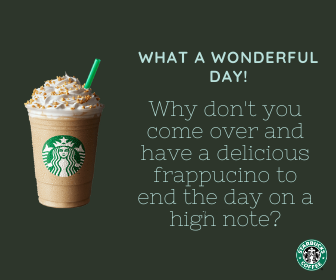

In [20]:
if result == 'POSITIVE': 
    display(pos)
else: 
    display(neg)